In [8]:
    import pandas_gbq
    import pandas as pd


    # ВАЖНО: это должен быть ID проекта из Вашего аккаунта Google Compute Engine
    # иначе пример не запустится
    project_id = "alien-clover-203818"

    sql = """
    SELECT SQLDATE, count(*) as Events,
    FROM `gdelt-bq.gdeltv2.events`
    WHERE EventBaseCode = '175' AND ActionGeo_ADM1Code = 'FR00' AND Year > 2017 AND Year < 2020
    GROUP BY SQLDATE
    """
    df = pandas_gbq.read_gbq(sql, project_id=project_id)
    df['SQLDATE'] = pd.to_datetime(df['SQLDATE'], format='%Y%m%d')
    df = df.groupby('SQLDATE').sum()


Downloading: 100%|██████████| 535/535 [00:00<00:00, 1633.52rows/s]


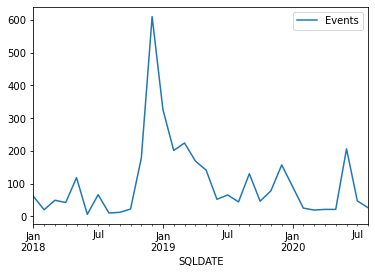

In [9]:
df.resample('M').sum().plot()

In [12]:

    sql = """
    SELECT SQLDATE, avg(AvgTone) as Tone,
    FROM `gdelt-bq.gdeltv2.events`
    WHERE EventBaseCode = '175' AND ActionGeo_ADM1Code = 'FR00' AND Year > 2017
    GROUP BY SQLDATE
    """
    df = pandas_gbq.read_gbq(sql, project_id=project_id)
    df['SQLDATE'] = pd.to_datetime(df['SQLDATE'], format='%Y%m%d')
    df = df.groupby('SQLDATE').sum()

Downloading: 100%|██████████| 535/535 [00:01<00:00, 485.51rows/s]


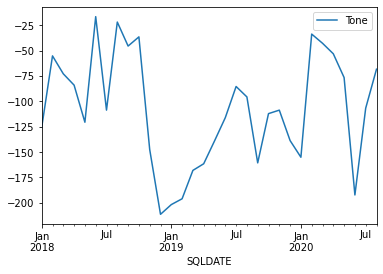

In [13]:
df.resample('M').sum().plot()

In [68]:

    sql = """
    SELECT MonthYear, Actor1Name, avg(AvgTone) as Tone,
    FROM `gdelt-bq.gdeltv2.events`
    WHERE EventBaseCode = '175' AND ActionGeo_ADM1Code = 'FR00' AND Year > 2017
    GROUP BY MonthYear, Actor1Name
    """
    df = pandas_gbq.read_gbq(sql, project_id=project_id)


Downloading: 100%|██████████| 504/504 [00:01<00:00, 498.96rows/s]


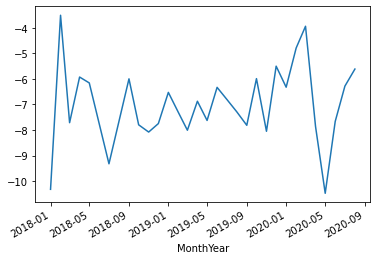

In [73]:
df_indexed = df.set_index(pd.to_datetime(df['MonthYear'] , format='%Y%m'))
df_indexed[df_indexed.Actor1Name.eq('POLICE')].loc[:, 'Tone'].plot()

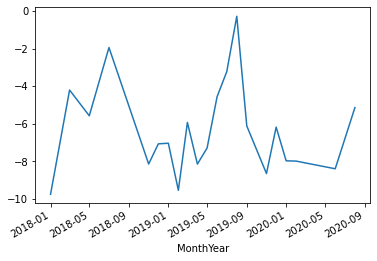

In [72]:
df_indexed[df_indexed.Actor1Name.eq('DEMONSTRATOR')].loc[:, 'Tone'].plot()